In [158]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from dateutil import parser
from scipy.interpolate import NearestNDInterpolator
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
from mu2e.dataframeprod import DataFrameMaker
from mu2e.hallprober import HallProbeGenerator
from hallprobesim_redux import *

In [3]:
#cfg_pickle_ = cfg_pickle(use_pickle=False, save_pickle=True, load_name='test', save_name='test', recreate=True)

In [4]:
# hmd, ff = field_map_analysis('fma_mau13', cfg_data_DS_Mau13,
#                              cfg_geom_cyl_800mm_long, cfg_params_DS_Mau13,
#                              cfg_pickle_, cfg_plot_mpl)

In [5]:
input_data = DataFrameMaker(cfg_data_DS_Mau13.path, input_type='pkl').data_frame

In [6]:
input_data

,X,Y,Z,Bx,By,Bz,R,Phi,Bphi,Br
0,-1.2,-1.2,3.071,1284.125788,1307.100001,442.195248,1.697056,-2.356194,-16.245222,-1832.273327
1,-1.2,-1.2,3.096,1312.127380,1335.143291,410.874370,1.697056,-2.356194,-16.274707,-1871.903043
2,-1.2,-1.2,3.121,1339.646202,1362.701661,376.958648,1.697056,-2.356194,-16.302671,-1910.848499
3,-1.2,-1.2,3.146,1366.531533,1389.624290,340.379319,1.697056,-2.356194,-16.329045,-1948.896473
4,-1.2,-1.2,3.171,1392.610688,1415.737061,301.071838,1.697056,-2.356194,-16.352815,-1985.801737
...,...,...,...,...,...,...,...,...,...,...
4902084,1.2,1.2,15.971,205.452081,204.896327,362.118995,1.697056,0.785398,-0.392978,290.160142
4902085,1.2,1.2,15.996,200.959435,200.443981,358.156213,1.697056,0.785398,-0.364481,283.835077
4902086,1.2,1.2,16.021,196.581608,196.105341,354.221831,1.697056,0.785398,-0.336772,277.671604
4902087,1.2,1.2,16.046,192.315417,191.877252,350.317143,1.697056,0.785398,-0.309830,271.665242


In [7]:
input_data.query(' and '.join(cfg_data_DS_Mau13.conditions))

,X,Y,Z,Bx,By,Bz,R,Phi,Bphi,Br
46,-1.2,-1.2,4.221,528.212859,545.865849,-1585.275548,1.697056,-2.356194,-12.482549,-759.488338
47,-1.2,-1.2,4.246,482.126053,499.539953,-1583.498973,1.697056,-2.356194,-12.313487,-694.142690
48,-1.2,-1.2,4.271,436.646625,453.822926,-1579.259121,1.697056,-2.356194,-12.145479,-629.657058
49,-1.2,-1.2,4.296,391.862394,408.802920,-1572.615491,1.697056,-2.356194,-11.978761,-566.155873
50,-1.2,-1.2,4.321,347.861152,364.568076,-1563.628461,1.697056,-2.356194,-11.813580,-503.763538
...,...,...,...,...,...,...,...,...,...,...
4901997,1.2,1.2,13.796,953.470367,947.401121,-517.307363,1.697056,0.785398,-4.291605,1344.119119
4901998,1.2,1.2,13.821,974.554053,968.189607,-478.885092,1.697056,0.785398,-4.500343,1373.727216
4901999,1.2,1.2,13.846,993.283142,986.649735,-438.672061,1.697056,0.785398,-4.690527,1400.023964
4902000,1.2,1.2,13.871,1009.552209,1002.677299,-397.023423,1.697056,0.785398,-4.861296,1422.861130


In [8]:
cfg_data_DS_Mau13

cfg_data(datatype='Mau13', magnet='DS', path='/home/ckampa/data/Bmaps/Mu2e_DSMap_V13', conditions=('Z>4.200', 'Z<13.900', 'R!=0'))

In [9]:
hpg = HallProbeGenerator(input_data, z_steps=cfg_geom_cyl_800mm_long.z_steps,
                        r_steps=cfg_geom_cyl_800mm_long.r_steps, phi_steps=cfg_geom_cyl_800mm_long.phi_steps,
                        x_steps=cfg_geom_cyl_800mm_long.x_steps, y_steps=cfg_geom_cyl_800mm_long.y_steps,
                        interpolate=cfg_geom_cyl_800mm_long.interpolate, do2pi=cfg_geom_cyl_800mm_long.do2pi)

In [10]:
np.unique([[i] for i in cfg_geom_cyl_800mm_long.r_steps])

array([0.025     , 0.03535534, 0.0559017 , 0.1677051 , 0.175     ,
       0.1767767 , 0.3354102 , 0.35355339, 0.375     , 0.525     ,
       0.53033009, 0.55901699, 0.78262379, 0.8       , 0.8131728 ])

In [11]:
hpg.sparse_field.index

Int64Index([2450309, 2501367, 2451351, 2400293, 2399772, 2500846, 2501888,
            2400814, 2349235, 2399251,
            ...
            1758286, 1043474, 2434544, 4068400, 2467888,  834032, 1276882,
            3601584, 3625550, 1300848],
           dtype='int64', length=15520)

In [12]:
B_input = input_data.iloc[hpg.sparse_field.index][['Bx', 'By', 'Bz']]

In [13]:
B_hpg = hpg.sparse_field[['Bx', 'By', 'Bz']]

In [14]:
(B_input - B_hpg).describe()

,Bx,By,Bz
count,15520.0,15520.0,15520.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [15]:
test_df = hpg.sparse_field

In [16]:
test_df

,X,Y,Z,Bx,By,Bz,R,Phi,Bphi,Br
2450309,0.000,-0.025,4.221,-12.869706,-30.438903,18937.287207,0.025000,-1.570796,-12.869706,30.438903
2501367,0.025,0.000,4.221,14.995168,-2.232945,18937.294685,0.025000,0.000000,-2.232945,14.995168
2451351,0.000,0.025,4.221,-12.700502,25.487139,18937.071379,0.025000,1.570796,12.700502,25.487139
2400293,-0.025,0.000,4.221,-40.591427,-2.735825,18937.059659,0.025000,3.141593,2.735825,40.591427
2399772,-0.025,-0.025,4.221,-40.665222,-30.675983,18936.497939,0.035355,-2.356194,-7.063459,50.445850
...,...,...,...,...,...,...,...,...,...,...
834032,-0.800,0.000,13.871,-3824.384529,19.862471,7901.854134,0.800000,3.141593,-19.862471,3824.384529
1276882,-0.575,-0.575,13.871,-2821.634439,-2845.751260,7953.420436,0.813173,-2.356194,17.053168,4007.446859
3601584,0.575,-0.575,13.871,2949.936804,-2922.392199,7975.263755,0.813173,-0.785398,19.476977,4152.363659
3625550,0.575,0.575,13.871,2960.108844,2914.733430,7974.756117,0.813173,0.785398,-32.085263,4154.140810


In [17]:
15520 / 8

1940.0

In [18]:
#test_df.to_pickle('/home/ckampa/Desktop/DSFM_test_data.pkl')

In [19]:
#test_df.to_csv('/home/ckampa/Desktop/DSFM_test_data.csv', index=False)

In [20]:
df = test_df

In [21]:
df

,X,Y,Z,Bx,By,Bz,R,Phi,Bphi,Br
2450309,0.000,-0.025,4.221,-12.869706,-30.438903,18937.287207,0.025000,-1.570796,-12.869706,30.438903
2501367,0.025,0.000,4.221,14.995168,-2.232945,18937.294685,0.025000,0.000000,-2.232945,14.995168
2451351,0.000,0.025,4.221,-12.700502,25.487139,18937.071379,0.025000,1.570796,12.700502,25.487139
2400293,-0.025,0.000,4.221,-40.591427,-2.735825,18937.059659,0.025000,3.141593,2.735825,40.591427
2399772,-0.025,-0.025,4.221,-40.665222,-30.675983,18936.497939,0.035355,-2.356194,-7.063459,50.445850
...,...,...,...,...,...,...,...,...,...,...
834032,-0.800,0.000,13.871,-3824.384529,19.862471,7901.854134,0.800000,3.141593,-19.862471,3824.384529
1276882,-0.575,-0.575,13.871,-2821.634439,-2845.751260,7953.420436,0.813173,-2.356194,17.053168,4007.446859
3601584,0.575,-0.575,13.871,2949.936804,-2922.392199,7975.263755,0.813173,-0.785398,19.476977,4152.363659
3625550,0.575,0.575,13.871,2960.108844,2914.733430,7974.756117,0.813173,0.785398,-32.085263,4154.140810


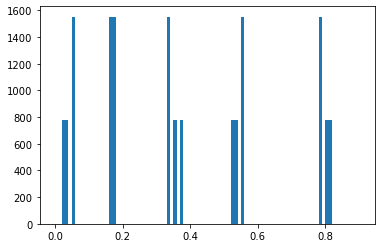

In [22]:
fig, ax = plt.subplots()
ax.hist(df.R, bins=np.linspace(0, 0.9, 91));

In [23]:
df.R.unique()

array([0.025     , 0.03535534, 0.0559017 , 0.1677051 , 0.175     ,
       0.1767767 , 0.3354102 , 0.35355339, 0.375     , 0.525     ,
       0.53033009, 0.55901699, 0.78262379, 0.8       , 0.8131728 ])

In [24]:
np.unique([[i] for i in cfg_geom_cyl_800mm_long.r_steps])

array([0.025     , 0.03535534, 0.0559017 , 0.1677051 , 0.175     ,
       0.1767767 , 0.3354102 , 0.35355339, 0.375     , 0.525     ,
       0.53033009, 0.55901699, 0.78262379, 0.8       , 0.8131728 ])

In [25]:
cfg_geom_cyl_800mm_long.r_steps

([0.025, 0.175, 0.375, 0.525, 0.8],
 [0.05590169944, 0.16770509831, 0.33541019663, 0.55901699437, 0.78262379213],
 [0.03535533906, 0.1767766953, 0.35355339059, 0.53033008589, 0.81317279836],
 [0.05590169944, 0.16770509831, 0.33541019663, 0.55901699437, 0.78262379213],
 [0.025, 0.175, 0.375, 0.525, 0.8],
 [0.05590169944, 0.16770509831, 0.33541019663, 0.55901699437, 0.78262379213],
 [0.03535533906, 0.1767766953, 0.35355339059, 0.53033008589, 0.81317279836],
 [0.05590169944, 0.16770509831, 0.33541019663, 0.55901699437, 0.78262379213])

In [26]:
np.diff(cfg_geom_cyl_800mm_long.z_steps)*1e3

array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50

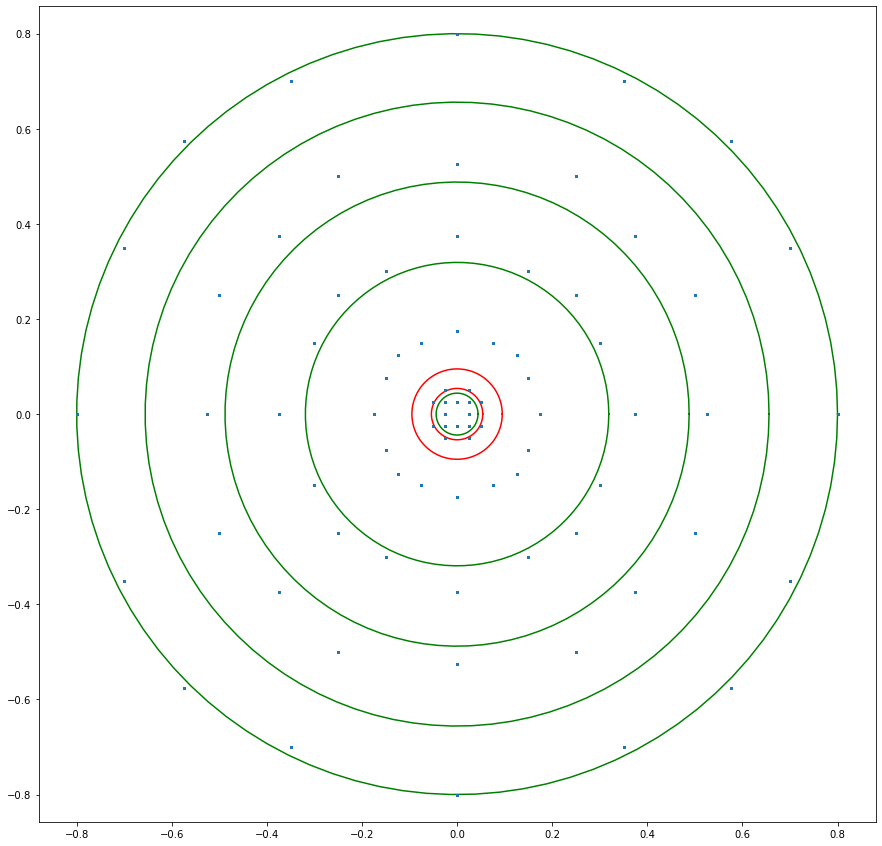

In [27]:
fig, ax = plt.subplots(figsize=(15,15))

ax.scatter(df.X, df.Y, s=1, zorder=100)

ts = np.linspace(0, 2*np.pi, 100)

for r in [0., 54., 95.,]:
    xs = 1e-3 * r * np.cos(ts)
    ys = 1e-3 * r * np.sin(ts)
    plt.plot(xs, ys, color='red', zorder=10)
    
for r in [44., 319., 488., 656., 800.]:
    xs = 1e-3 * r * np.cos(ts)
    ys = 1e-3 * r * np.sin(ts)
    plt.plot(xs, ys, color='green', zorder=11)

#ax.set_xlim([])
    
ax.axis('equal');

In [28]:
df.Phi.unique()

array([-1.57079633,  0.        ,  1.57079633,  3.14159265, -2.35619449,
       -0.78539816,  0.78539816,  2.35619449, -2.67794504, -2.03444394,
       -1.10714872, -0.46364761,  0.46364761,  1.10714872,  2.03444394,
        2.67794504])

In [29]:
df

,X,Y,Z,Bx,By,Bz,R,Phi,Bphi,Br
2450309,0.000,-0.025,4.221,-12.869706,-30.438903,18937.287207,0.025000,-1.570796,-12.869706,30.438903
2501367,0.025,0.000,4.221,14.995168,-2.232945,18937.294685,0.025000,0.000000,-2.232945,14.995168
2451351,0.000,0.025,4.221,-12.700502,25.487139,18937.071379,0.025000,1.570796,12.700502,25.487139
2400293,-0.025,0.000,4.221,-40.591427,-2.735825,18937.059659,0.025000,3.141593,2.735825,40.591427
2399772,-0.025,-0.025,4.221,-40.665222,-30.675983,18936.497939,0.035355,-2.356194,-7.063459,50.445850
...,...,...,...,...,...,...,...,...,...,...
834032,-0.800,0.000,13.871,-3824.384529,19.862471,7901.854134,0.800000,3.141593,-19.862471,3824.384529
1276882,-0.575,-0.575,13.871,-2821.634439,-2845.751260,7953.420436,0.813173,-2.356194,17.053168,4007.446859
3601584,0.575,-0.575,13.871,2949.936804,-2922.392199,7975.263755,0.813173,-0.785398,19.476977,4152.363659
3625550,0.575,0.575,13.871,2960.108844,2914.733430,7974.756117,0.813173,0.785398,-32.085263,4154.140810


# Alternative Approach: Nearest Neighbor
- Use all locations actually used by FMS -- find nearest Mau13 point and use the field from there
- Or interpolate to that location -- this is in particle_EM_tracks

In [30]:
from emtracks.mapinterp import get_df_interp_func

In [31]:
DS_cyl = get_df_interp_func(filename='/home/shared_data/Bmaps/Mu2e_DSMap_V13.p',
                            gauss=False, mm=False, Blabels=['Br', 'Bphi', 'Bz'])
DS_car = get_df_interp_func(filename='/home/shared_data/Bmaps/Mu2e_DSMap_V13.p',
                            gauss=False, mm=False, Blabels=['Bx', 'By', 'Bz'])

In [169]:
# def DS_cyl_extrap(pos):
#     try:
#         return DS_cyl(pos)
#     except:
#         Bx_interp = NearestNDInterpolator([])

In [170]:
#DS_car([0.8, 0.8, 21.])

In [171]:
#DS_cyl([0., 0.8, 21.])

In [32]:
DS_car([0., 0.8, 4.8])

array([1.65460799e-03, 1.86498212e-01, 1.73459175e+00])

In [33]:
DS_cyl([0., 0.8, 4.8])

array([ 1.86498212e-01, -1.65460799e-03,  1.73459175e+00])

- Coordinates for now:
    - Hall probe: with Hall element and electronics facing "out of page"
        - Y points to top of card
        - X points to the right
        - Z out of page

In [249]:
Rs_small = 1e-3*np.array([0., 54., -95.,]) # CHECK SIGNS!!
Rs_large = 1e-3*np.array([44., -319., 488., -656., 800.])

# x = 0, y = 1, z = 2 -- in HP coordinates
# these arrays specify which HP coordinate represents Br, Bphi, Bz
Coords_small = np.array([[1, 0, -2], [-1, -0, -2], [1, 0, -2]]) # CHECK SIGNS XY!
Coords_large = np.array([[-1, 0, 2], [1, -0, 2], [1, -0, 2], [1, -0, 2], [1, -0, 2]])

Coords_SP_dict = np.array([{'Bx': ['Bphi', 1.], 'By': ['Br', 1.], 'Bz': ['Bz', -1.]},
                           {'Bx': ['Bphi', -1.], 'By': ['Br', -1.], 'Bz': ['Bz', -1.]},
                           {'Bx': ['Bphi', 1.], 'By': ['Br', 1.], 'Bz': ['Bz', -1.]},
                          ])
Coords_BP_dict = np.array([{'Bx': ['Bphi', 1.], 'By': ['Br', -1.], 'Bz': ['Bz', 1.]},
                           {'Bx': ['Bphi', -1.], 'By': ['Br', 1.], 'Bz': ['Bz', 1.]},
                           {'Bx': ['Bphi', -1.], 'By': ['Br', 1.], 'Bz': ['Bz', 1.]},
                           {'Bx': ['Bphi', -1.], 'By': ['Br', 1.], 'Bz': ['Bz', 1.]},
                           {'Bx': ['Bphi', -1.], 'By': ['Br', 1.], 'Bz': ['Bz', 1.]},
                          ])


Rs = np.concatenate([Rs_small, Rs_large])
HP_labs = np.array(['SP1', 'SP2', 'SP3', 'BP1', 'BP2', 'BP3', 'BP4', 'BP5'])
HP_IDs = np.array(['4C0000000D55C93A', '8E0000000D51483A', '6A0000000D61333A', 'C50000000D5E473A',
                   'DF0000000D5E803A', 'C90000000D53983A', 'FA0000000D60163A', '2F0000000D5EC73A']) # using 1-8
HP_V_slope = np.array([2.871e6, 2.813e6, 2.940e6, 2.973e6, 2.957e6, 2.863e6, 2.875e06, 2.831e6])
HP_V_off = np.array([-6.169e4, -6.300e4, -6.546e4, -6.136e4, -6.346e4, -6.160e4, -5.939e4, -5.737e4])

HP_labs_SP = HP_labs[0:3]
HP_labs_BP = HP_labs[3:]
HP_IDs_SP = HP_IDs[0:3]
HP_IDs_BP = HP_IDs[3:]
HP_V_slope_SP = HP_V_slope[0:3]
HP_V_slope_BP = HP_V_slope[3:]
HP_V_off_SP = HP_V_off[0:3]
HP_V_off_BP = HP_V_off[3:]

Phis = np.linspace(0, 2*np.pi, 17)[:-1]
Phis_SP = Phis + np.pi/4.

NMR_Phi = np.pi/2. # probe on BP at -319, want it in -y direction
NMR_R = -319. * 1e-3
X_NMR = NMR_R * np.cos(NMR_Phi)
Y_NMR = NMR_R * np.sin(NMR_Phi)

# RR, PP = np.meshgrid(Rs, Phis)

RR_BP, PP_BP = np.meshgrid(Rs_large, Phis)
RR_SP, PP_SP = np.meshgrid(Rs_small, Phis_SP)

# Z0s = 
END_MEAS_SP = 2980. * 1e-3
START_MEAS_SP = 13685. * 1e-3
step_Z = 0.05 # 5 cm step, for now
Zs_SP = np.arange(START_MEAS_SP, END_MEAS_SP, -step_Z)
delta_Z_BP_SP = -1335. * 1e-3
Zs_BP = Zs_SP - delta_Z_BP_SP
# 1557.87
delta_Z_NMR_SP = -1557.87 * 1e-3
Zs_NMR = Zs_SP - delta_Z_NMR_SP

# 13685-2980

In [186]:
i = 0
HP_labs_BP[i], HP_IDs_BP[i], Coords_BP_dict[i]

('BP1',
 'C50000000D5E473A',
 {'Bx': ['Bphi', 1.0], 'By': ['Br', -1.0], 'Bz': ['Bz', 1.0]})

In [187]:
# test
i = 0
row = df.iloc[0]
Bx, By, Bz, Br, Bphi = [row.Bx, row.By, row.Bz, row.Br, row.Bphi]

c_dict = Coords_BP_dict[i]
Bx_Hall = c_dict['Bx'][1]*df[c_dict['Bx'][0]].iloc[0]
By_Hall = c_dict['By'][1]*df[c_dict['By'][0]].iloc[0]
Bz_Hall = c_dict['Bz'][1]*df[c_dict['Bz'][0]].iloc[0]

In [188]:
Bx_Hall, By_Hall, Bz_Hall

(-12.869706196, -30.438903014, 18937.2872073)

In [189]:
Br, Bphi, Bz

(30.438903014, -12.869706196, 18937.2872073)

In [190]:
row

X           0.000000
Y          -0.025000
Z           4.221000
Bx        -12.869706
By        -30.438903
Bz      18937.287207
R           0.025000
Phi        -1.570796
Bphi      -12.869706
Br         30.438903
Name: 2450309, dtype: float64

In [191]:
# write to file:
# TIMESTAMP, X_NMR, Y_NMR, Z_NMR, HP_1_#, HP_1_ID, HP_1_X, HP_1_Y, HP_1_Z, ...
# HP_1_Bx_Meas, HP_1_Bx_Mu2e, HP_1_By_Meas, HP_1_By_Mu2e, HP_1_Bz_Meas, HP_1_Bz_Mu2e,
# HP_1_V1, HP_1_V2, HP_1_V3, ... ALL Hall probes - 7 , 8 , 9

In [322]:
single_HP_cols = ['ID', 'X', 'Y', 'Z', 'Vx', 'Vy', 'Vz', 'Temperature',
                  'Bx_Meas', 'By_Meas', 'Bz_Meas', 'Br', 'Bphi', 'Bz']

HP_SP_col_list = list(np.concatenate([[f'HP_SP{j}_{i}' for i in single_HP_cols] for j in [1, 2, 3]]))
HP_BP_col_list = list(np.concatenate([[f'HP_BP{j}_{i}' for i in single_HP_cols] for j in [1, 2, 3, 4, 5]]))
col_list = ['TIMESTAMP', 'Mapper_Angle', 'Mapper_Z', 'X_NMR', 'Y_NMR', 'Z_NMR', 'B_NMR']+HP_SP_col_list+HP_BP_col_list

In [323]:
# define a dataframe
df_EMMA = pd.DataFrame(columns=['TIMESTAMP', 'Mapper_Angle', 'Mapper_Z', 'X_NMR', 'Y_NMR', 'Z_NMR', 'B_NMR']+HP_SP_col_list+HP_BP_col_list)

In [279]:
# starttime
t0 = parser.parse('2021-07-21 12:00:00')
dt_Phi = timedelta(seconds=120) # assume 2 minutes per step for azimuthal move
dt_Z = timedelta(seconds=240) # 4 minutes when moving z

In [280]:
str(t0+dt+dt)

'2021-07-21 12:04:00'

In [281]:
t0 + timedelta(seconds=120) # 2 minute time steps

datetime.datetime(2021, 7, 21, 12, 2)

In [282]:
df_EMMA

,TIMESTAMP,X_NMR,Y_NMR,Z_NMR,B_NMR,HP_SP1_ID,HP_SP1_X,HP_SP1_Y,HP_SP1_Z,HP_SP1_Vx,...,HP_BP5_Vx,HP_BP5_Vy,HP_BP5_Vz,HP_BP5_Temperature,HP_BP5_Bx_Meas,HP_BP5_By_Meas,HP_BP5_Bz_Meas,HP_BP5_Br,HP_BP5_Bphi,HP_BP5_Bz


In [283]:
np.array(col_list)

array(['TIMESTAMP', 'X_NMR', 'Y_NMR', 'Z_NMR', 'B_NMR', 'HP_SP1_ID',
       'HP_SP1_X', 'HP_SP1_Y', 'HP_SP1_Z', 'HP_SP1_Vx', 'HP_SP1_Vy',
       'HP_SP1_Vz', 'HP_SP1_Temperature', 'HP_SP1_Bx_Meas',
       'HP_SP1_By_Meas', 'HP_SP1_Bz_Meas', 'HP_SP1_Br', 'HP_SP1_Bphi',
       'HP_SP1_Bz', 'HP_SP2_ID', 'HP_SP2_X', 'HP_SP2_Y', 'HP_SP2_Z',
       'HP_SP2_Vx', 'HP_SP2_Vy', 'HP_SP2_Vz', 'HP_SP2_Temperature',
       'HP_SP2_Bx_Meas', 'HP_SP2_By_Meas', 'HP_SP2_Bz_Meas', 'HP_SP2_Br',
       'HP_SP2_Bphi', 'HP_SP2_Bz', 'HP_SP3_ID', 'HP_SP3_X', 'HP_SP3_Y',
       'HP_SP3_Z', 'HP_SP3_Vx', 'HP_SP3_Vy', 'HP_SP3_Vz',
       'HP_SP3_Temperature', 'HP_SP3_Bx_Meas', 'HP_SP3_By_Meas',
       'HP_SP3_Bz_Meas', 'HP_SP3_Br', 'HP_SP3_Bphi', 'HP_SP3_Bz',
       'HP_BP1_ID', 'HP_BP1_X', 'HP_BP1_Y', 'HP_BP1_Z', 'HP_BP1_Vx',
       'HP_BP1_Vy', 'HP_BP1_Vz', 'HP_BP1_Temperature', 'HP_BP1_Bx_Meas',
       'HP_BP1_By_Meas', 'HP_BP1_Bz_Meas', 'HP_BP1_Br', 'HP_BP1_Bphi',
       'HP_BP1_Bz', 'HP_BP2_ID', 'HP_BP2_X', '

In [284]:
len(col_list)

117

In [285]:
i = 0
B_vec_NMR = DS_car([X_NMR, Y_NMR, Zs_NMR[i]])
B_NMR = np.linalg.norm(DS_car([X_NMR, Y_NMR, Zs_NMR[i]]))

In [286]:
B_NMR, B_vec_NMR

(0.1421178889894176, array([ 0.00046277, -0.02488031,  0.1399223 ]))

In [287]:
np.linalg.norm(B_vec_NMR)

0.1421178889894176

In [288]:
np.linalg.norm(DS_cyl
               
               
               ([X_NMR, Y_NMR, Zs_NMR[i]]))

0.1421178889894176

In [289]:
HP_labs_BP

array(['BP1', 'BP2', 'BP3', 'BP4', 'BP5'], dtype='<U3')

In [250]:
def temp_DS(pos):
    return 22. - 0.1 * (pos[2] - 4.) + 1. * (pos[1])

In [273]:
temp_DS([0.,0.,13.]), temp_DS([0.,0.,4.])

(21.1, 22.0)

In [274]:
temp_DS([0.,0.,13.]), temp_DS([0.,1.,13.])

(21.1, 22.1)

In [275]:
temp_DS([0.,0.,13.]), temp_DS([1.,0.,13.])

(21.1, 21.1)

In [337]:
def return_row(time, Z_ind, Phi_ind, ):
    row = {}
    # phi
    Phi = Phis[Phi_ind]
    Phi_BP = Phi
    Phi_SP = Phis_SP[Phi_ind]
    # time
    row['TIMESTAMP'] = str(time)
    # mapper
    row['Mapper_Angle'] = Phi
    row['Mapper_Z'] = Zs_NMR[Z_ind]
    # NMR
    row['X_NMR'] = X_NMR
    row['Y_NMR'] = Y_NMR
    row['Z_NMR'] = Zs_NMR[Z_ind]
    B_NMR = np.linalg.norm(DS_car([X_NMR, Y_NMR, Zs_NMR[Z_ind]]))
#     if B_NMR < 0.7: # NMR cutoff
#         B_NMR = 0.0
    row['B_NMR'] = B_NMR
    # Hall probes
    # small propeller
    #print('SP')
    for i in range(len(HP_IDs_SP)):
        #print(i)
        pre = f'HP_{HP_labs_SP[i]}'
        row[f'{pre}_ID'] = HP_IDs_SP[i]
        # coords
        X_ = Rs_small[i] * np.cos(Phi_SP)
        Y_ = Rs_small[i] * np.sin(Phi_SP)
        Z_ = Zs_SP[Z_ind]
        row[f'{pre}_X'] = X_
        row[f'{pre}_Y'] = Y_
        row[f'{pre}_Z'] = Z_
        # field
        Br, Bphi, Bz = DS_cyl([X_, Y_, Z_])
        B_dict = {'Br': Br, 'Bphi': Bphi, 'Bz': Bz}
        Bx_ = Coords_SP_dict[i]['Bx'][1] * B_dict[Coords_SP_dict[i]['Bx'][0]]
        By_ = Coords_SP_dict[i]['By'][1] * B_dict[Coords_SP_dict[i]['By'][0]]
        Bz_ = Coords_SP_dict[i]['Bz'][1] * B_dict[Coords_SP_dict[i]['Bz'][0]]
        # voltages
        Vx_ = HP_V_off_SP[i] + HP_V_slope_SP[i] * Bx_
        Vy_ = HP_V_off_SP[i] + HP_V_slope_SP[i] * By_
        Vz_ = HP_V_off_SP[i] + HP_V_slope_SP[i] * Bz_
        # temperature
        Temp_ = temp_DS([X_, Y_, Z_])
        # write to row
        row[f'{pre}_Vx'] = Vx_
        row[f'{pre}_Vy'] = Vy_
        row[f'{pre}_Vz'] = Vz_
        row[f'{pre}_Temperature'] = Temp_
        row[f'{pre}_Bx_Meas'] = Bx_
        row[f'{pre}_By_Meas'] = By_
        row[f'{pre}_Bz_Meas'] = Bz_
        row[f'{pre}_Br'] = Br
        row[f'{pre}_Bphi'] = Bphi
        row[f'{pre}_Bz'] = Bz
    # big propeller
    #print('BP')
    for i in range(len(HP_IDs_BP)):
        #print(i)
        pre = f'HP_{HP_labs_BP[i]}'
        row[f'{pre}_ID'] = HP_IDs_BP[i]
        # coords
        X_ = Rs_large[i] * np.cos(Phi_BP)
        Y_ = Rs_large[i] * np.sin(Phi_BP)
        Z_ = Zs_BP[Z_ind]
        row[f'{pre}_X'] = X_
        row[f'{pre}_Y'] = Y_
        row[f'{pre}_Z'] = Z_
        # field
        Br, Bphi, Bz = DS_cyl([X_, Y_, Z_])
        B_dict = {'Br': Br, 'Bphi': Bphi, 'Bz': Bz}
        Bx_ = Coords_BP_dict[i]['Bx'][1] * B_dict[Coords_BP_dict[i]['Bx'][0]]
        By_ = Coords_BP_dict[i]['By'][1] * B_dict[Coords_BP_dict[i]['By'][0]]
        Bz_ = Coords_BP_dict[i]['Bz'][1] * B_dict[Coords_BP_dict[i]['Bz'][0]]
        # voltages
        Vx_ = HP_V_off_BP[i] + HP_V_slope_BP[i] * Bx_
        Vy_ = HP_V_off_BP[i] + HP_V_slope_BP[i] * By_
        Vz_ = HP_V_off_BP[i] + HP_V_slope_BP[i] * Bz_
        # temperature
        Temp_ = temp_DS([X_, Y_, Z_])
        # write to row
        row[f'{pre}_Vx'] = Vx_
        row[f'{pre}_Vy'] = Vy_
        row[f'{pre}_Vz'] = Vz_
        row[f'{pre}_Temperature'] = Temp_
        row[f'{pre}_Bx_Meas'] = Bx_
        row[f'{pre}_By_Meas'] = By_
        row[f'{pre}_Bz_Meas'] = Bz_
        row[f'{pre}_Br'] = Br
        row[f'{pre}_Bphi'] = Bphi
        row[f'{pre}_Bz'] = Bz
        
    return row

In [338]:
%time row = return_row(t0, 0, 0)

CPU times: user 2.03 ms, sys: 0 ns, total: 2.03 ms
Wall time: 1.57 ms


In [339]:
row = return_row(t0, 0, 0)

In [340]:
#row

In [357]:
# generate dataframe

rows_list = []

t = t0
# i = 0

for Z_ind in range(len(Zs_NMR)):
    #t += dt_Z
    for Phi_ind in range(len(Phis)):
        #t += dt_Phi
        row = return_row(t, Z_ind, Phi_ind)
        rows_list.append(row)
        t += dt_Phi
    t += dt_Z

df_EMMA = pd.DataFrame(rows_list)

In [358]:
df_EMMA

,TIMESTAMP,Mapper_Angle,Mapper_Z,X_NMR,Y_NMR,Z_NMR,B_NMR,HP_SP1_ID,HP_SP1_X,HP_SP1_Y,...,HP_BP5_Vx,HP_BP5_Vy,HP_BP5_Vz,HP_BP5_Temperature,HP_BP5_Bx_Meas,HP_BP5_By_Meas,HP_BP5_Bz_Meas,HP_BP5_Br,HP_BP5_Bphi,HP_BP5_Bz
0,2021-07-21 12:00:00,0.000000,15.24287,-1.953312e-17,-0.319,15.24287,0.142118,4C0000000D55C93A,0.0,0.0,...,-57063.462006,149978.713517,3.378109e+05,20.898000,0.000108,0.073242,0.139591,0.073242,-0.000108,0.139591
1,2021-07-21 12:02:00,0.392699,15.24287,-1.953312e-17,-0.319,15.24287,0.142118,4C0000000D55C93A,0.0,0.0,...,-56429.999375,149938.842782,3.379242e+05,21.204147,0.000332,0.073228,0.139631,0.073228,-0.000332,0.139631
2,2021-07-21 12:04:00,0.785398,15.24287,-1.953312e-17,-0.319,15.24287,0.142118,4C0000000D55C93A,0.0,0.0,...,-55840.321936,149806.558156,3.384032e+05,21.463685,0.000540,0.073181,0.139800,0.073181,-0.000540,0.139800
3,2021-07-21 12:06:00,1.178097,15.24287,-1.953312e-17,-0.319,15.24287,0.142118,4C0000000D55C93A,-0.0,0.0,...,-55371.956333,149535.744336,3.391707e+05,21.637104,0.000706,0.073086,0.140071,0.073086,-0.000706,0.140071
4,2021-07-21 12:08:00,1.570796,15.24287,-1.953312e-17,-0.319,15.24287,0.142118,4C0000000D55C93A,-0.0,0.0,...,-55126.697518,149148.223453,3.401593e+05,21.698000,0.000792,0.072949,0.140420,0.072949,-0.000792,0.140420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,2021-07-26 20:46:00,4.319690,4.54287,-1.953312e-17,-0.319,4.54287,1.837437,4C0000000D55C93A,0.0,-0.0,...,-52593.753200,-37618.415579,5.556186e+06,21.228896,0.001687,0.006977,1.982888,0.006977,-0.001687,1.982888
3436,2021-07-26 20:48:00,4.712389,4.54287,-1.953312e-17,-0.319,4.54287,1.837437,4C0000000D55C93A,0.0,-0.0,...,-51759.944155,-39869.775375,5.562622e+06,21.168000,0.001982,0.006182,1.985161,0.006182,-0.001982,1.985161
3437,2021-07-26 20:50:00,5.105088,4.54287,-1.953312e-17,-0.319,4.54287,1.837437,4C0000000D55C93A,0.0,-0.0,...,-51792.577860,-42236.528615,5.567011e+06,21.228896,0.001970,0.005346,1.986712,0.005346,-0.001970,1.986712
3438,2021-07-26 20:52:00,5.497787,4.54287,-1.953312e-17,-0.319,4.54287,1.837437,4C0000000D55C93A,0.0,-0.0,...,-52845.566958,-44544.026019,5.572059e+06,21.402315,0.001598,0.004531,1.988495,0.004531,-0.001598,1.988495


In [359]:
for col in col_list:
    if not col in df_EMMA.columns:
        print(col)

In [360]:
v = 4
# save
df_EMMA.to_pickle(f'/home/shared_data/FMS_Monitor/DSFM_test_data_v{v}.pkl')
# df_EMMA.to_csv('/home/shared_data/FMS_Monitor/DSFM_test_data_v2.csv', index=False)
df_EMMA.to_csv(f'/home/shared_data/FMS_Monitor/DSFM_test_data_v{v}.csv')

In [361]:
len(col_list)

119

In [ ]:
df_EMMA['']

In [300]:
# some basic plots

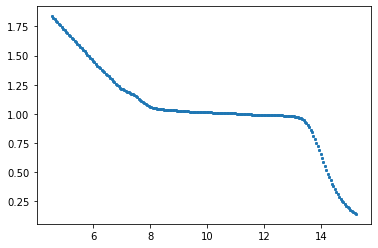

In [343]:
fig, ax = plt.subplots()
ax.scatter(df_EMMA.Z_NMR, df_EMMA.B_NMR, s=1)

In [345]:
df_EMMA.B_NMR.min(), df_EMMA.B_NMR.max()

(0.1421178889894176, 1.8374369582773435)

In [352]:
# out of range high field
(df_EMMA.B_NMR < 0.7).sum() / 16

27.0

In [354]:
# out of range low field
(df_EMMA.B_NMR < 0.26).sum() / 16

11.0

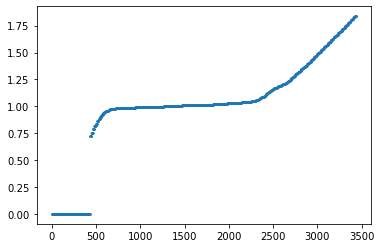

In [302]:
fig, ax = plt.subplots()
ax.scatter(df_EMMA.index, df_EMMA.B_NMR, s=1)

In [307]:
df_EMMA.Z_NMR.unique()

array([15.24287, 15.19287, 15.14287, 15.09287, 15.04287, 14.99287,
       14.94287, 14.89287, 14.84287, 14.79287, 14.74287, 14.69287,
       14.64287, 14.59287, 14.54287, 14.49287, 14.44287, 14.39287,
       14.34287, 14.29287, 14.24287, 14.19287, 14.14287, 14.09287,
       14.04287, 13.99287, 13.94287, 13.89287, 13.84287, 13.79287,
       13.74287, 13.69287, 13.64287, 13.59287, 13.54287, 13.49287,
       13.44287, 13.39287, 13.34287, 13.29287, 13.24287, 13.19287,
       13.14287, 13.09287, 13.04287, 12.99287, 12.94287, 12.89287,
       12.84287, 12.79287, 12.74287, 12.69287, 12.64287, 12.59287,
       12.54287, 12.49287, 12.44287, 12.39287, 12.34287, 12.29287,
       12.24287, 12.19287, 12.14287, 12.09287, 12.04287, 11.99287,
       11.94287, 11.89287, 11.84287, 11.79287, 11.74287, 11.69287,
       11.64287, 11.59287, 11.54287, 11.49287, 11.44287, 11.39287,
       11.34287, 11.29287, 11.24287, 11.19287, 11.14287, 11.09287,
       11.04287, 10.99287, 10.94287, 10.89287, 10.84287, 10.79

In [ ]:
df_EMMA['HP_BP1_X']

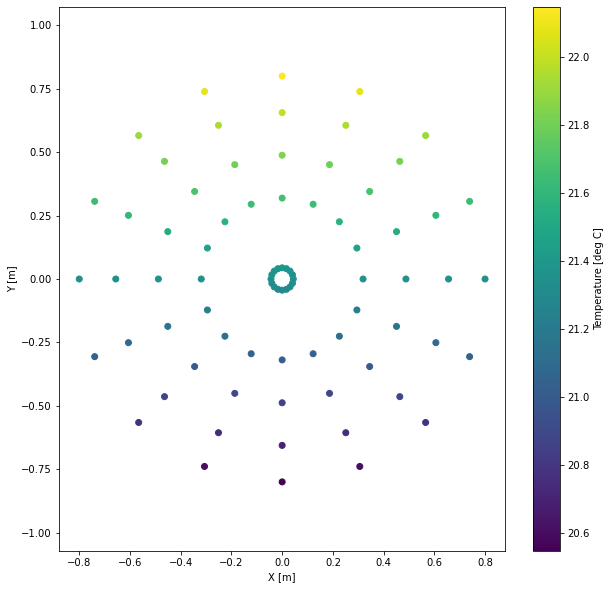

In [320]:
#df_ = df_EMMA.query('Z_NMR == 10.74287')
df_ = df_EMMA[np.isclose(df_EMMA.Z_NMR, 10.74287)]
fig, ax = plt.subplots(figsize=(10,10))
Xs = []
Ys = []
Ts = []
for i in [1, 2, 3, 4, 5]:
    Xs.append(df_[f'HP_BP{i}_X'].values)
    Ys.append(df_[f'HP_BP{i}_Y'].values)
    Ts.append(df_[f'HP_BP{i}_Temperature'].values)
Xs = np.concatenate(Xs)
Ys = np.concatenate(Ys)
Ts = np.concatenate(Ts)
sc = ax.scatter(Xs, Ys, c=Ts)
cb = fig.colorbar(sc, label='Temperature [deg C]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.axis('equal');

In [313]:
df_

,TIMESTAMP,X_NMR,Y_NMR,Z_NMR,B_NMR,HP_SP1_ID,HP_SP1_X,HP_SP1_Y,HP_SP1_Z,HP_SP1_Vx,...,HP_BP5_Vx,HP_BP5_Vy,HP_BP5_Vz,HP_BP5_Temperature,HP_BP5_Bx_Meas,HP_BP5_By_Meas,HP_BP5_Bz_Meas,HP_BP5_Br,HP_BP5_Bphi,HP_BP5_Bz


In [303]:
df_EMMA

,TIMESTAMP,X_NMR,Y_NMR,Z_NMR,B_NMR,HP_SP1_ID,HP_SP1_X,HP_SP1_Y,HP_SP1_Z,HP_SP1_Vx,...,HP_BP5_Vx,HP_BP5_Vy,HP_BP5_Vz,HP_BP5_Temperature,HP_BP5_Bx_Meas,HP_BP5_By_Meas,HP_BP5_Bz_Meas,HP_BP5_Br,HP_BP5_Bphi,HP_BP5_Bz
0,2021-07-21 12:04:00,-1.953312e-17,-0.319,15.24287,0.000000,4C0000000D55C93A,0.0,0.0,13.685,-60775.833581,...,-57063.462006,149978.713517,3.378109e+05,20.898000,0.000108,0.073242,0.139591,0.073242,-0.000108,0.139591
1,2021-07-21 12:04:00,-1.953312e-17,-0.319,15.24287,0.000000,4C0000000D55C93A,0.0,0.0,13.685,-60775.833581,...,-56429.999375,149938.842782,3.379242e+05,21.204147,0.000332,0.073228,0.139631,0.073228,-0.000332,0.139631
2,2021-07-21 12:04:00,-1.953312e-17,-0.319,15.24287,0.000000,4C0000000D55C93A,0.0,0.0,13.685,-60775.833581,...,-55840.321936,149806.558156,3.384032e+05,21.463685,0.000540,0.073181,0.139800,0.073181,-0.000540,0.139800
3,2021-07-21 12:04:00,-1.953312e-17,-0.319,15.24287,0.000000,4C0000000D55C93A,-0.0,0.0,13.685,-60775.833581,...,-55371.956333,149535.744336,3.391707e+05,21.637104,0.000706,0.073086,0.140071,0.073086,-0.000706,0.140071
4,2021-07-21 12:04:00,-1.953312e-17,-0.319,15.24287,0.000000,4C0000000D55C93A,-0.0,0.0,13.685,-60775.833581,...,-55126.697518,149148.223453,3.401593e+05,21.698000,0.000792,0.072949,0.140420,0.072949,-0.000792,0.140420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,2021-07-22 02:20:00,-1.953312e-17,-0.319,4.54287,1.837437,4C0000000D55C93A,0.0,-0.0,2.985,-62445.565434,...,-52593.753200,-37618.415579,5.556186e+06,21.228896,0.001687,0.006977,1.982888,0.006977,-0.001687,1.982888
3436,2021-07-22 02:20:00,-1.953312e-17,-0.319,4.54287,1.837437,4C0000000D55C93A,0.0,-0.0,2.985,-62445.565434,...,-51759.944155,-39869.775375,5.562622e+06,21.168000,0.001982,0.006182,1.985161,0.006182,-0.001982,1.985161
3437,2021-07-22 02:20:00,-1.953312e-17,-0.319,4.54287,1.837437,4C0000000D55C93A,0.0,-0.0,2.985,-62445.565434,...,-51792.577860,-42236.528615,5.567011e+06,21.228896,0.001970,0.005346,1.986712,0.005346,-0.001970,1.986712
3438,2021-07-22 02:20:00,-1.953312e-17,-0.319,4.54287,1.837437,4C0000000D55C93A,0.0,-0.0,2.985,-62445.565434,...,-52845.566958,-44544.026019,5.572059e+06,21.402315,0.001598,0.004531,1.988495,0.004531,-0.001598,1.988495


In [304]:
# variable = 'world'
variable = 10
'hello ' + str(variable) + '!'

'hello {0} {1} {2}'.format(variable, "hi", np.inf)
f'hello {variable} {"hi"} {np.inf}'

'hello 10 hi inf'

In [270]:
fluxdensity = 1.449221219458029580983509714124
f"FluxDensity:{fluxdensity:.6f}"

'FluxDensity:1.449221'

In [ ]:
def write_NMR(index, dataframe):
    # 
    fluxdensity = dataframe['B_NMR'].iloc[index]
    NMR_array = np.array(['ProbeName:NMR', "ProbeID:...",
                          f"FluxDensity:{fluxdensity}"])
    
    nptdms.write_channel([])
    
    
def write_Hall():
    #
    
    #
    #
# def
#. .....


def write_group(index, dataframe):
    write_NMR(index, dataframe)
    write_Hall()
    ..
    .
    .
    

In [ ]:
df = pd.read_pickle(input_file)

for i in range(len(df)):
    write_group(i, df)

In [256]:
columns = ['B_NMR', 'X_NMR', 'Y_NMR', 'Z_NMR']

df_EMMA[columns].iloc[0].values

array([ 0.00000000e+00, -1.95331164e-17, -3.19000000e-01,  1.52428700e+01])

In [257]:
df_EMMA[columns]

,B_NMR,X_NMR,Y_NMR,Z_NMR
0,0.000000,-1.953312e-17,-0.319,15.24287
1,0.000000,-1.953312e-17,-0.319,15.24287
2,0.000000,-1.953312e-17,-0.319,15.24287
3,0.000000,-1.953312e-17,-0.319,15.24287
4,0.000000,-1.953312e-17,-0.319,15.24287
...,...,...,...,...
3435,1.837437,-1.953312e-17,-0.319,4.54287
3436,1.837437,-1.953312e-17,-0.319,4.54287
3437,1.837437,-1.953312e-17,-0.319,4.54287
3438,1.837437,-1.953312e-17,-0.319,4.54287


In [222]:
len(Zs_BP)*len(Phis) * 8 # number of hall probe readings

27520

In [48]:
Zs_SP

array([13.685, 13.635, 13.585, 13.535, 13.485, 13.435, 13.385, 13.335,
       13.285, 13.235, 13.185, 13.135, 13.085, 13.035, 12.985, 12.935,
       12.885, 12.835, 12.785, 12.735, 12.685, 12.635, 12.585, 12.535,
       12.485, 12.435, 12.385, 12.335, 12.285, 12.235, 12.185, 12.135,
       12.085, 12.035, 11.985, 11.935, 11.885, 11.835, 11.785, 11.735,
       11.685, 11.635, 11.585, 11.535, 11.485, 11.435, 11.385, 11.335,
       11.285, 11.235, 11.185, 11.135, 11.085, 11.035, 10.985, 10.935,
       10.885, 10.835, 10.785, 10.735, 10.685, 10.635, 10.585, 10.535,
       10.485, 10.435, 10.385, 10.335, 10.285, 10.235, 10.185, 10.135,
       10.085, 10.035,  9.985,  9.935,  9.885,  9.835,  9.785,  9.735,
        9.685,  9.635,  9.585,  9.535,  9.485,  9.435,  9.385,  9.335,
        9.285,  9.235,  9.185,  9.135,  9.085,  9.035,  8.985,  8.935,
        8.885,  8.835,  8.785,  8.735,  8.685,  8.635,  8.585,  8.535,
        8.485,  8.435,  8.385,  8.335,  8.285,  8.235,  8.185,  8.135,
      

In [49]:
Zs_BP

array([15.02, 14.97, 14.92, 14.87, 14.82, 14.77, 14.72, 14.67, 14.62,
       14.57, 14.52, 14.47, 14.42, 14.37, 14.32, 14.27, 14.22, 14.17,
       14.12, 14.07, 14.02, 13.97, 13.92, 13.87, 13.82, 13.77, 13.72,
       13.67, 13.62, 13.57, 13.52, 13.47, 13.42, 13.37, 13.32, 13.27,
       13.22, 13.17, 13.12, 13.07, 13.02, 12.97, 12.92, 12.87, 12.82,
       12.77, 12.72, 12.67, 12.62, 12.57, 12.52, 12.47, 12.42, 12.37,
       12.32, 12.27, 12.22, 12.17, 12.12, 12.07, 12.02, 11.97, 11.92,
       11.87, 11.82, 11.77, 11.72, 11.67, 11.62, 11.57, 11.52, 11.47,
       11.42, 11.37, 11.32, 11.27, 11.22, 11.17, 11.12, 11.07, 11.02,
       10.97, 10.92, 10.87, 10.82, 10.77, 10.72, 10.67, 10.62, 10.57,
       10.52, 10.47, 10.42, 10.37, 10.32, 10.27, 10.22, 10.17, 10.12,
       10.07, 10.02,  9.97,  9.92,  9.87,  9.82,  9.77,  9.72,  9.67,
        9.62,  9.57,  9.52,  9.47,  9.42,  9.37,  9.32,  9.27,  9.22,
        9.17,  9.12,  9.07,  9.02,  8.97,  8.92,  8.87,  8.82,  8.77,
        8.72,  8.67,

In [50]:
Zs_NMR

array([15.24287, 15.19287, 15.14287, 15.09287, 15.04287, 14.99287,
       14.94287, 14.89287, 14.84287, 14.79287, 14.74287, 14.69287,
       14.64287, 14.59287, 14.54287, 14.49287, 14.44287, 14.39287,
       14.34287, 14.29287, 14.24287, 14.19287, 14.14287, 14.09287,
       14.04287, 13.99287, 13.94287, 13.89287, 13.84287, 13.79287,
       13.74287, 13.69287, 13.64287, 13.59287, 13.54287, 13.49287,
       13.44287, 13.39287, 13.34287, 13.29287, 13.24287, 13.19287,
       13.14287, 13.09287, 13.04287, 12.99287, 12.94287, 12.89287,
       12.84287, 12.79287, 12.74287, 12.69287, 12.64287, 12.59287,
       12.54287, 12.49287, 12.44287, 12.39287, 12.34287, 12.29287,
       12.24287, 12.19287, 12.14287, 12.09287, 12.04287, 11.99287,
       11.94287, 11.89287, 11.84287, 11.79287, 11.74287, 11.69287,
       11.64287, 11.59287, 11.54287, 11.49287, 11.44287, 11.39287,
       11.34287, 11.29287, 11.24287, 11.19287, 11.14287, 11.09287,
       11.04287, 10.99287, 10.94287, 10.89287, 10.84287, 10.79

In [35]:
# XX = RR * np.cos(PP)
# YY = RR * np.sin(PP)

In [ ]:
XX_BP = RR * np.cos(PP)
YY_BP = RR * np.sin(PP)

In [36]:
len(Phis)

16